<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-01-27 18:18:33--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  66.0MB/s    in 3.1s    

2025-01-27 18:18:37 (66.0 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [5]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)

   COUNT(*)
0     65437


**Demo 2: List all tables**


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


In [9]:
!pip install numpy pandas matplotlib

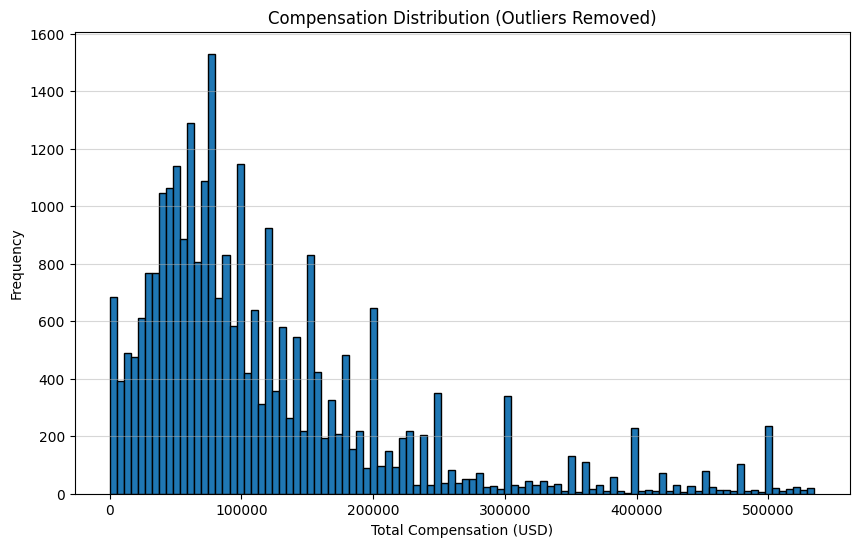

In [10]:
## Write your code here

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

conn = sqlite3.connect('survey-data.sqlite')

# Define SQL query
QUERY = """
SELECT CompTotal
FROM main
WHERE CompTotal IS NOT NULL
"""

# Execute the query and load data into dataframe
df_comptotal = pd.read_sql_query(QUERY, conn)

# Convert to numeric and drop NaN values
df_comptotal['CompTotal'] = pd.to_numeric(df_comptotal['CompTotal'], errors='coerce')
df_comptotal = df_comptotal.dropna()

# Calculate quartiles and IQR
Q1 = df_comptotal['CompTotal'].quantile(0.25)
Q3 = df_comptotal['CompTotal'].quantile(0.75)
IQR = Q3 - Q1

# Set bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
filtered_df_comptotal = df_comptotal[(df_comptotal['CompTotal'] >= lower_bound) & (df_comptotal['CompTotal'] <= upper_bound)]

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(filtered_df_comptotal['CompTotal'], bins=100, edgecolor='k')
plt.title('Compensation Distribution (Outliers Removed)')
plt.xlabel('Total Compensation (USD)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5)
plt.show()

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


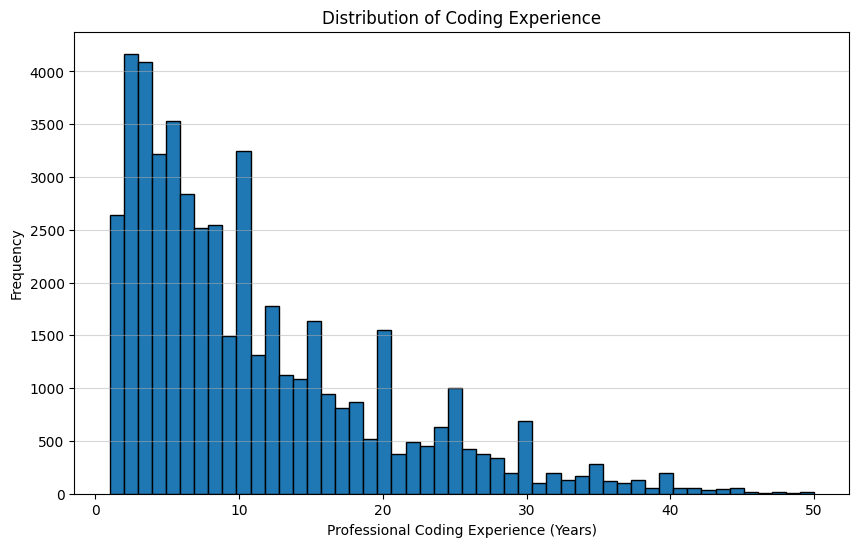

In [11]:
## Write your code here

QUERY = """
SELECT YearsCodePro
FROM main
WHERE YearsCodePro IS NOT NULL
"""
# Execute the query and load data into dataframe
df_years = pd.read_sql_query(QUERY, conn)

df_years['YearsCodePro'] = pd.to_numeric(df_years['YearsCodePro'], errors='coerce')
df_years = df_years.dropna()

# Create the histogram plot
plt.figure(figsize=(10, 6))
plt.hist(df_years['YearsCodePro'], bins=50, edgecolor='k')
plt.title('Distribution of Coding Experience')
plt.xlabel('Professional Coding Experience (Years)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5)
plt.show()

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


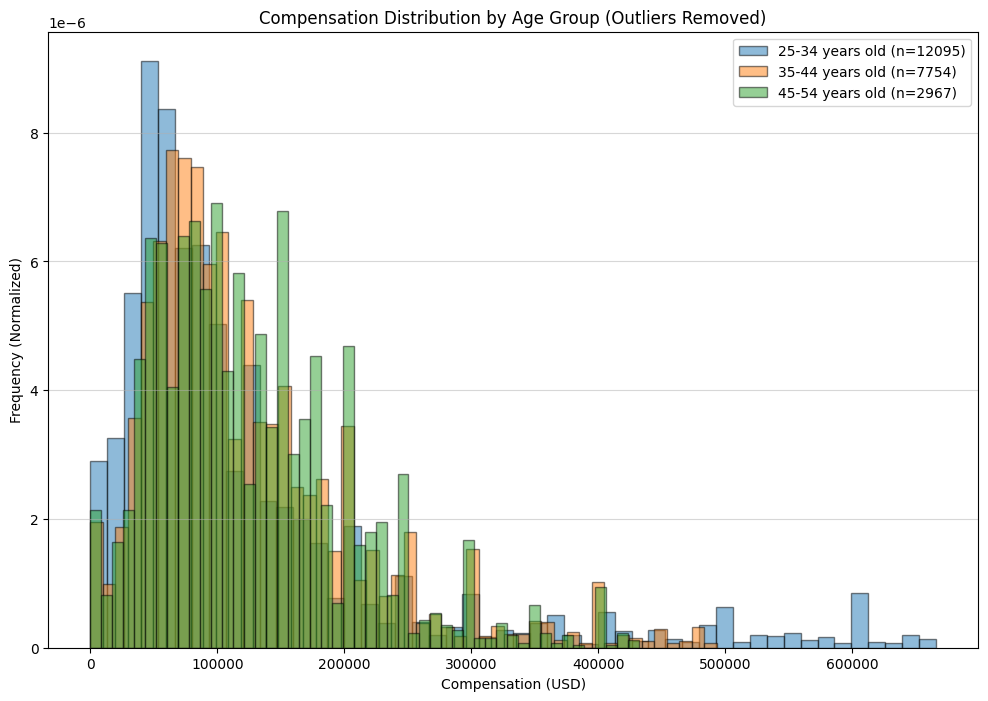

In [12]:
## Write your code here

# SQL Query to get Age and CompTotal
QUERY = """
SELECT Age, CompTotal
FROM main
WHERE Age IS NOT NULL AND CompTotal IS NOT NULL
"""

df_comp_age = pd.read_sql_query(QUERY, conn)

# Convert CompTotal to numeric and drop NaN values
df_comp_age['CompTotal'] = pd.to_numeric(df_comp_age['CompTotal'], errors='coerce')
df_comp_age = df_comp_age.dropna()

# Filter for Specific Age Groups
age_groups = ['25-34 years old', '35-44 years old', '45-54 years old']
filtered_df = df_comp_age[df_comp_age['Age'].isin(age_groups)]

# Plotting Histograms
plt.figure(figsize=(12, 8))

for age in age_groups:
    age_group_df = filtered_df[filtered_df['Age'] == age]

    # Remove Outliers Using IQR
    Q1 = age_group_df['CompTotal'].quantile(0.25)
    Q3 = age_group_df['CompTotal'].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    age_group_df = age_group_df[(age_group_df['CompTotal'] >= lower_bound) & 
                                (age_group_df['CompTotal'] <= upper_bound)]
    
    # Plot Histogram for Age Group
    plt.hist(age_group_df['CompTotal'], bins=50, alpha=0.5, density=True, 
             label=f'{age} (n={len(age_group_df)})', edgecolor='k')

plt.title('Compensation Distribution by Age Group (Outliers Removed)')
plt.xlabel('Compensation (USD)')
plt.ylabel('Frequency (Normalized)')
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.show()

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


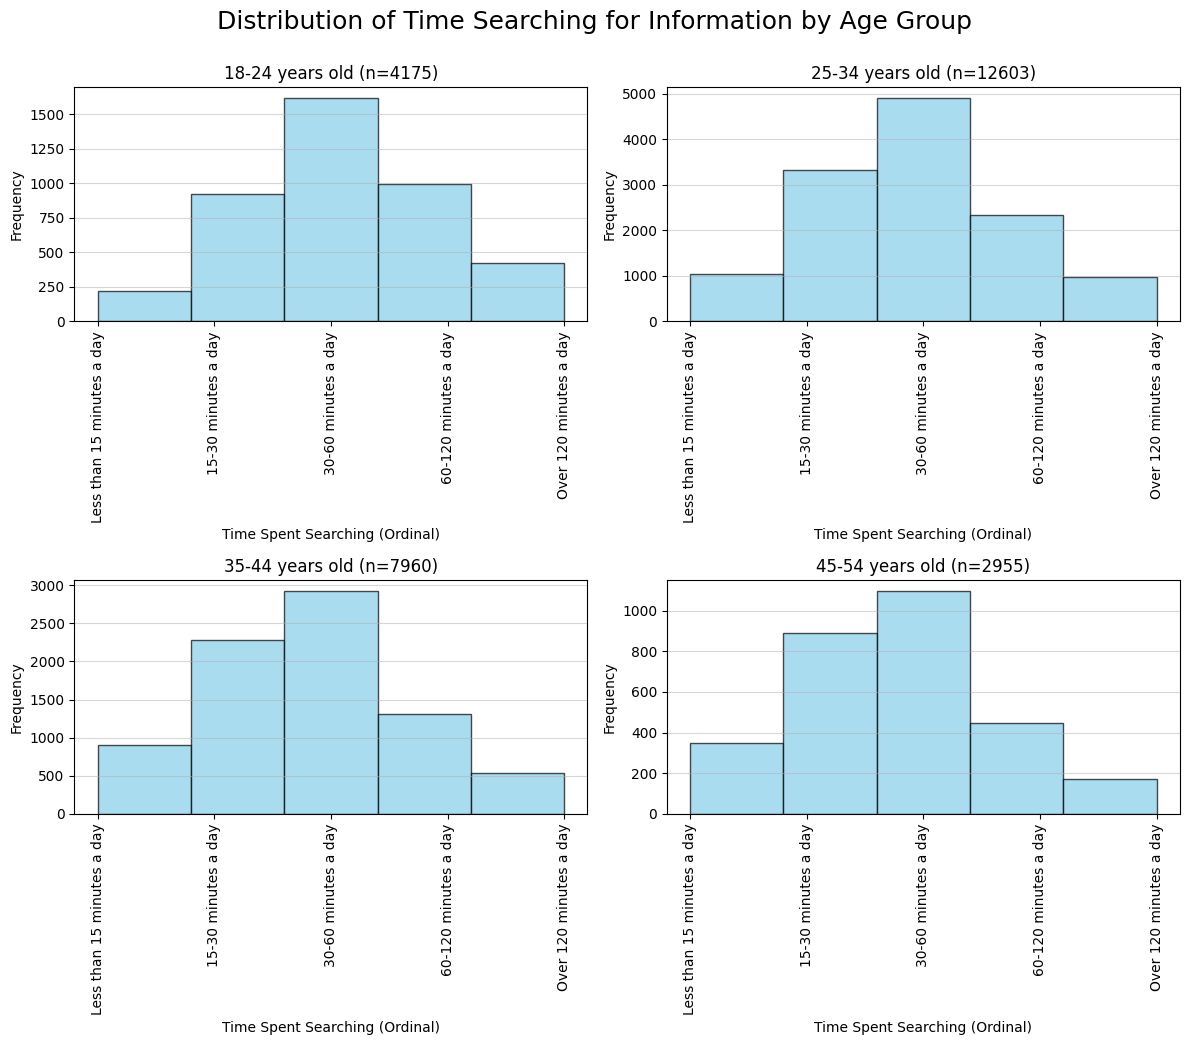

In [13]:
## Write your code here

# SQL Query to get Age and TimeSearching
QUERY = """
SELECT Age, TimeSearching
FROM main
WHERE Age IS NOT NULL AND TimeSearching IS NOT NULL
"""
df_age_search = pd.read_sql_query(QUERY, conn)

# Map TimeSearching to Ordinal Values
time_mapping = {
    'Less than 15 minutes a day': 1,
    '15-30 minutes a day': 2,
    '30-60 minutes a day': 3,
    '60-120 minutes a day': 4,
    'Over 120 minutes a day': 5
}
df_age_search['TimeSearchingNum'] = df_age_search['TimeSearching'].map(time_mapping)

# Filter for Relevant Age Groups
age_groups = ['18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old']
filtered_df = df_age_search[df_age_search['Age'].isin(age_groups)]

# Set Up Subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2x2 grid of subplots
axes = axes.flatten()  # Flatten the axes array for easy looping

# Plot Each Age Group in a Subplot
for i, age in enumerate(age_groups):
    age_group_df = filtered_df[filtered_df['Age'] == age]
    axes[i].hist(age_group_df['TimeSearchingNum'], bins=5, alpha=0.7, color='skyblue', edgecolor='k')
    axes[i].set_title(f'{age} (n={len(age_group_df)})')
    axes[i].set_xticks(list(time_mapping.values()))
    axes[i].set_xticklabels(list(time_mapping.keys()), rotation=90)
    axes[i].set_xlabel('Time Spent Searching (Ordinal)')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(axis='y', alpha=0.5)

# Adjust Layout for Better Spacing
plt.tight_layout()
plt.suptitle('Distribution of Time Searching for Information by Age Group', fontsize=18, y=1.04)
plt.show()

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


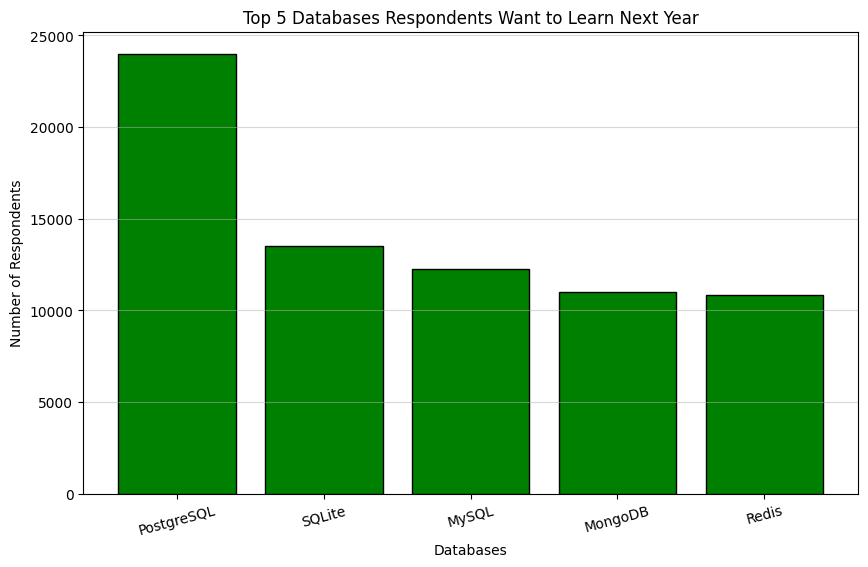

In [14]:
from collections import Counter

# SQL Query to get DatabaseWantToWorkWith
QUERY = """
SELECT DatabaseWantToWorkWith
FROM main
WHERE DatabaseWantToWorkWith IS NOT NULL
"""
df_databases = pd.read_sql_query(QUERY, conn)

# Process DatabaseWantToWorkWith Column
database_list = ';'.join(df_databases['DatabaseWantToWorkWith']).split(';')
database_counts = Counter(database_list)

# Get the Top 5 Databases
top_5 = database_counts.most_common(5)
top_5_names = [db[0] for db in top_5]
top_5_counts = [db[1] for db in top_5]

# Plotting the Histogram
plt.figure(figsize=(10, 6))
plt.bar(top_5_names, top_5_counts, color='green', edgecolor='k')

plt.title('Top 5 Databases Respondents Want to Learn Next Year')
plt.xlabel('Databases')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=15)
plt.grid(axis='y', alpha=0.5)
plt.show()


**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


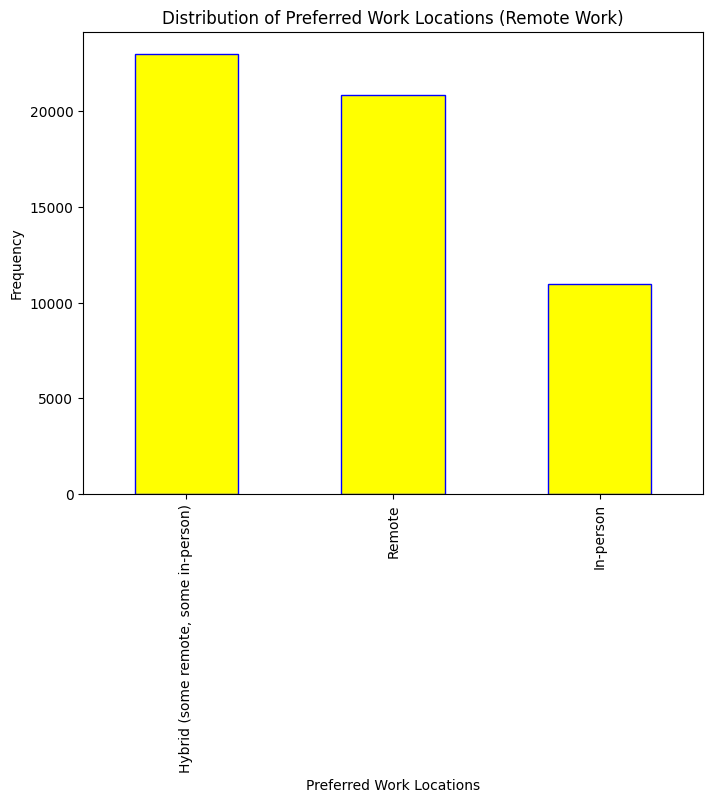

In [15]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query the data for 'RemoteWork' column
data_query = "SELECT RemoteWork FROM main;" 
data = pd.read_sql_query(data_query, conn)

# Clean the data by removing any NaN values
data_cleaned = data.dropna(subset=['RemoteWork'])

# Count the frequency of each preferred work location
remote_work_counts = data_cleaned['RemoteWork'].value_counts()

# Plot a bar chart of preferred work locations
plt.figure(figsize=(8, 6))
remote_work_counts.plot(kind='bar', color='yellow', edgecolor='blue')

# Add labels and title
plt.xlabel('Preferred Work Locations')
plt.ylabel('Frequency')
plt.title('Distribution of Preferred Work Locations (Remote Work)')

# Show the plot
plt.show()


### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


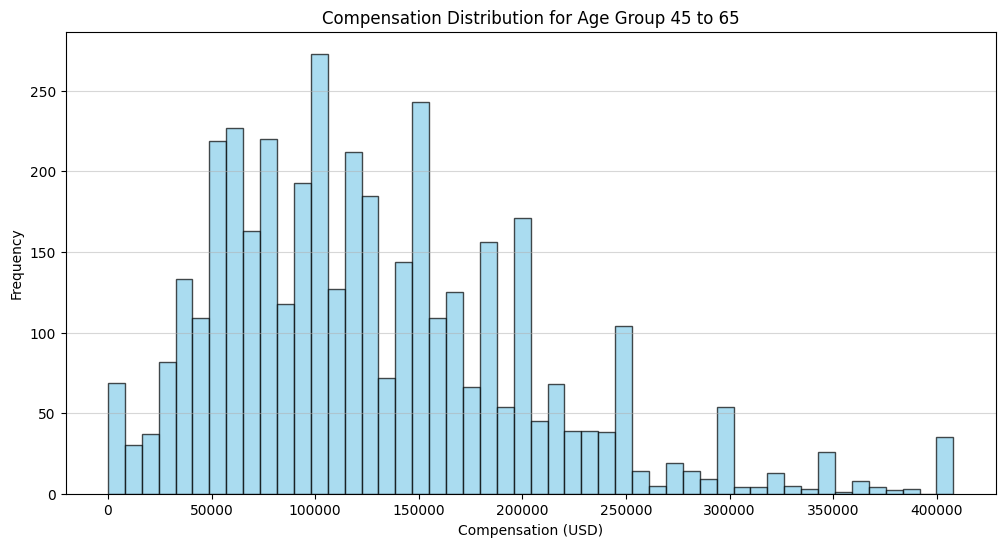

In [16]:
## Write your code here

# SQL Query to get Age and CompTotal
QUERY = """
SELECT Age, CompTotal
FROM main
WHERE Age IS NOT NULL AND CompTotal IS NOT NULL
"""
df_age_comp = pd.read_sql_query(QUERY, conn)

# Convert CompTotal to numeric and drop NaN values
df_age_comp['CompTotal'] = pd.to_numeric(df_age_comp['CompTotal'], errors='coerce')
df_age_comp = df_age_comp.dropna()

# Map Age to Numerical Values (for filtering 45 to 60)
age_mapping = {
    'Under 18 years old': 15,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 65
}
df_age_comp['AgeNum'] = df_age_comp['Age'].map(age_mapping)

# Filter for Ages between 45 and 65
df_filtered = df_age_comp[(df_age_comp['AgeNum'] >= 45) & (df_age_comp['AgeNum'] <= 60)]

# Remove Outliers Using IQR
Q1 = df_filtered['CompTotal'].quantile(0.25)
Q3 = df_filtered['CompTotal'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df_filtered[(df_filtered['CompTotal'] >= lower_bound) & 
                          (df_filtered['CompTotal'] <= upper_bound)]

# Plot Histogram for Age Group 45-60
plt.figure(figsize=(12, 6))
plt.hist(df_filtered['CompTotal'], bins=50, edgecolor='k', alpha=0.7, color='skyblue')

plt.title('Compensation Distribution for Age Group 45 to 65')
plt.xlabel('Compensation (USD)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5)
plt.show()


**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


/tmp/ipykernel_5155/2799987826.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['YearsCodeGroup'] = pd.cut(data_cleaned['YearsCodePro'], bins=bins, labels=labels, right=False)


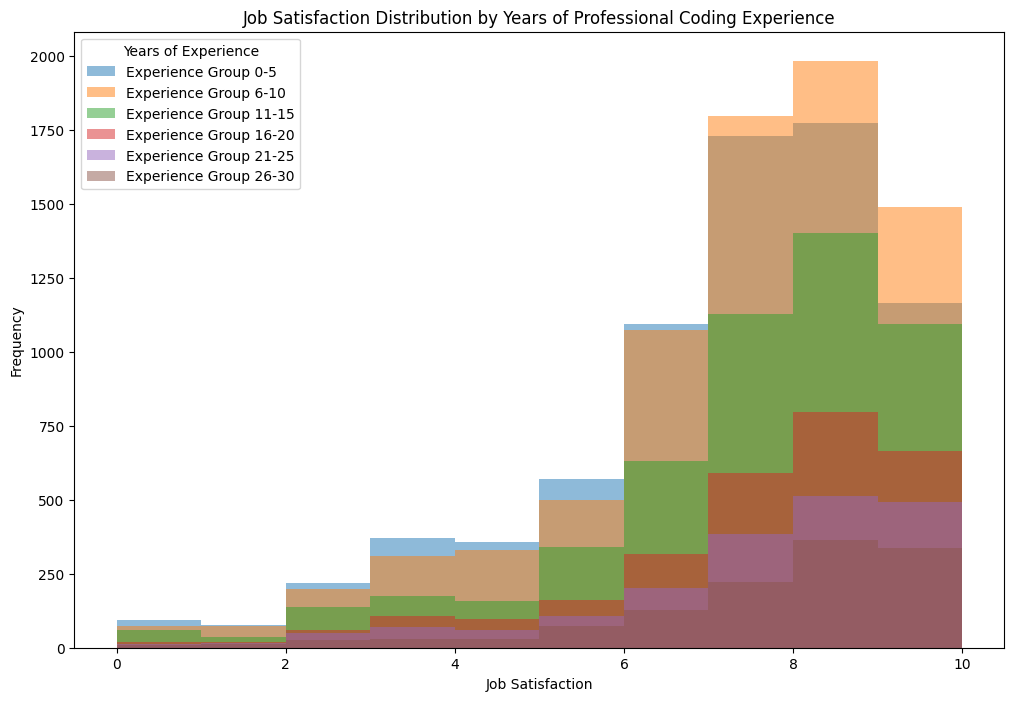

In [22]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite') 

# Query the data for 'JobSat' and 'YearsCodePro' columns
data_query = "SELECT JobSat, YearsCodePro FROM main;"  
data = pd.read_sql_query(data_query, conn)

# Convert 'JobSat' and 'YearsCodePro' columns to numeric, coercing errors to NaN (if any non-numeric values)
data['JobSat'] = pd.to_numeric(data['JobSat'], errors='coerce')
data['YearsCodePro'] = pd.to_numeric(data['YearsCodePro'], errors='coerce')

# Drop rows with NaN in 'JobSat' or 'YearsCodePro'
data_cleaned = data.dropna(subset=['JobSat', 'YearsCodePro'])

# Group the 'YearsCodePro' into ranges (e.g., 0-5 years, 6-10 years, etc.)
bins = [0, 5, 10, 15, 20, 25, 30]  # Adjust the bin ranges if needed
labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30']
data_cleaned['YearsCodeGroup'] = pd.cut(data_cleaned['YearsCodePro'], bins=bins, labels=labels, right=False)

# Plot histograms of 'JobSat' for each experience group
plt.figure(figsize=(12, 8))

# Loop over each experience group to plot individual histograms
for label in labels:
    subset = data_cleaned[data_cleaned['YearsCodeGroup'] == label]
    plt.hist(subset['JobSat'], bins=10, alpha=0.5, label=f'Experience Group {label}')

# Add labels and title
plt.xlabel('Job Satisfaction')
plt.ylabel('Frequency')
plt.title('Job Satisfaction Distribution by Years of Professional Coding Experience')
plt.legend(title='Years of Experience')

# Show the plot
plt.show()


### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [23]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
